# weekly assignment 1 

- import files to jupiter document 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sklearn as sk
import math
from sklearn.linear_model import LinearRegression #remember, this is linear regression model from sk-learn
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

#steps_csv moet bij de komma's gescheiden worden
steps = pd.read_csv('steps.csv',sep = ';')
survey = pd.read_csv('survey.csv')
#steps = steps.fillna('0')
print(steps)

      id  20-6-2013  21-6-2013  22-6-2013  23-6-2013  24-6-2013  25-6-2013  \
0      1        NaN        NaN        NaN        NaN     3941.0    15733.0   
1      2        NaN        NaN    10473.0      705.0     4287.0     5507.0   
2      3        NaN    11428.0    12523.0     2553.0      190.0     2164.0   
3      4        NaN        NaN        NaN        NaN        NaN        NaN   
4      5        NaN        NaN        NaN        NaN        NaN        NaN   
..   ...        ...        ...        ...        ...        ...        ...   
924  925        NaN     4571.0    10471.0     5899.0    15295.0     9178.0   
925  926        NaN        NaN        NaN        NaN        NaN        NaN   
926  927        NaN        NaN        NaN     1623.0        NaN        NaN   
927  928        NaN        NaN    14411.0    14364.0    26629.0    13092.0   
928  929        NaN     3324.0     4507.0    14364.0     4098.0     7299.0   

     26-6-2013  27-6-2013  28-6-2013  ...  4-5-2014  5-5-2014  

- extra kolom toevoegen met het mean aantal stappen per participant

In [2]:
steps['steps_mean'] = steps.iloc[:,2:329].mean(numeric_only=True,axis=1)
steps.head()

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014,steps_mean
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10205.521212
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5687.423313
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN,8301.729730
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3633.200000
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5312.129630


- kijken hoe de survey file eruit ziet 

In [3]:
print(survey)

      id         city  gender    age  hh_size  education          education_1  \
0      1     Bordeaux    Male  25-34        4          4  Master or doctorate   
1      2        Lille    Male  35-44        1          3             Bachelor   
2      3  Montpellier    Male  25-34        2          2  Master or doctorate   
3      4         Lyon    Male    <25        1          1             Bachelor   
4      5  Montpellier  Female  25-34        3          4             Bachelor   
..   ...          ...     ...    ...      ...        ...                  ...   
924  925        Lille  Female  45-54        3          4  Master or doctorate   
925  926        Lille    Male    <25        3          5             Bachelor   
926  927  Montpellier    Male  35-44        2          2             Bachelor   
927  928        Lille  Female  55-64        1          1          High school   
928  929         Lyon    Male  25-34        2          2          High school   

     height  weight  
0    

- mergen van de twee files en dan printen om te kijken hoe het eruit ziet

In [4]:
df_merged = pd.merge(survey, steps, on = 'id')
print(df_merged)

      id         city  gender    age  hh_size  education          education_1  \
0      1     Bordeaux    Male  25-34        4          4  Master or doctorate   
1      2        Lille    Male  35-44        1          3             Bachelor   
2      3  Montpellier    Male  25-34        2          2  Master or doctorate   
3      4         Lyon    Male    <25        1          1             Bachelor   
4      5  Montpellier  Female  25-34        3          4             Bachelor   
..   ...          ...     ...    ...      ...        ...                  ...   
924  925        Lille  Female  45-54        3          4  Master or doctorate   
925  926        Lille    Male    <25        3          5             Bachelor   
926  927  Montpellier    Male  35-44        2          2             Bachelor   
927  928        Lille  Female  55-64        1          1          High school   
928  929         Lyon    Male  25-34        2          2          High school   

     height  weight  20-6-2

- door de df te beschrijven blijken er wellicht dat er waardes niet helemaal kloppen

In [5]:
df_merged.describe()


,id,hh_size,education,height,weight,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,...,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014,steps_mean
count,929.000000,929.000000,929.000000,928.000000,927.000000,24.000000,243.000000,278.000000,296.000000,354.000000,...,78.000000,56.000000,56.000000,49.000000,71.000000,86.000000,81.000000,66.000000,0.0,925.000000
mean,465.000000,2.342304,2.530678,171.668103,72.833873,3642.416667,9034.724280,10889.636691,7402.847973,8110.370056,...,6897.923077,8434.303571,9870.107143,7209.693878,9570.690141,7614.848837,6805.925926,7505.530303,NaN,7093.010643
std,268.323499,1.226129,1.274491,9.080235,25.902717,3951.910368,6412.774483,6283.204309,6733.291773,5495.536639,...,5915.429173,4960.932295,6812.625746,7539.387846,7264.297875,5521.711875,8458.979146,4706.609481,NaN,8839.458754
min,1.000000,1.000000,1.000000,145.000000,6.000000,164.000000,67.000000,25.000000,43.000000,11.000000,...,12.000000,90.000000,88.000000,8.000000,664.000000,103.000000,12.000000,388.000000,NaN,4.000000
25%,233.000000,1.000000,1.000000,165.000000,61.000000,299.500000,4395.500000,6524.250000,2726.750000,4428.250000,...,2082.000000,5525.750000,5629.500000,3393.000000,5149.000000,3950.000000,2510.000000,4932.000000,NaN,4636.000000
50%,465.000000,2.000000,2.000000,172.000000,71.000000,834.000000,8561.000000,9980.000000,5652.000000,7740.000000,...,6460.000000,7834.500000,9331.000000,5378.000000,7235.000000,6627.000000,3120.000000,6568.500000,NaN,6245.006061
75%,697.000000,3.000000,4.000000,179.000000,81.000000,6060.000000,12182.000000,14338.750000,10472.750000,10464.000000,...,9899.000000,11691.000000,14239.250000,8907.000000,12062.500000,10031.500000,6544.000000,9549.000000,NaN,8399.670213
max,929.000000,11.000000,5.000000,195.000000,700.000000,11157.000000,44944.000000,39165.000000,40392.000000,29862.000000,...,26654.000000,26660.000000,38400.000000,37530.000000,33379.000000,27605.000000,36031.000000,33660.000000,NaN,250638.250000


het lijkt mij sterk dat er iemand is die 700 kilo weegt, dus gaan wij even kijken of er nog meer van dat soort rare gewichten tussen zitten 

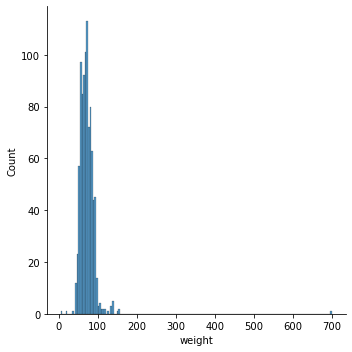

In [6]:
sns.displot(x="weight", data = df_merged)
plt.show()

het ziet er naar uit dat er alleen 1 waarde afwijkt (700), die wordt dus vervangen met een nan waarde 

In [7]:
df_merged["weight"]=df_merged["weight"].replace(700,np.nan)

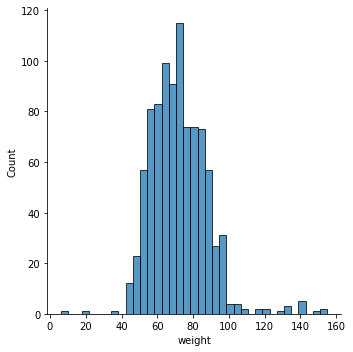

In [8]:
sns.displot(x="weight", data = df_merged)
plt.show()

voor de rest zien alle waardes er wel prima uit 

nu gaan wij kijken naar de mean steps per participant om te kijken of daar rare dingen aan de hand zijn 

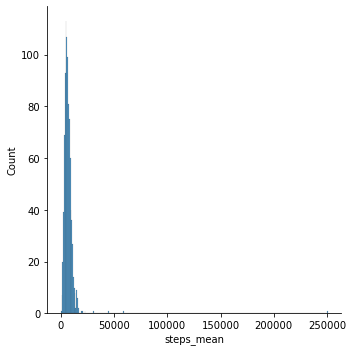

In [9]:
sns.displot(x="steps_mean", data = df_merged)

250000 steppen lijkt mij wel heel veel. Alles boven 75000 verwijderen

In [10]:
df_merged=df_merged[df_merged['steps_mean']<75000]

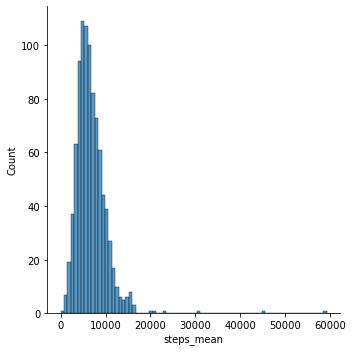

In [11]:
sns.displot(x="steps_mean", data = df_merged)


60000 stappen lijkt mij wel echt onredelijk veel, maar tegelijkertijd wel mogelijk, dus worden die er ingelaten 

In [12]:
print(df_merged['steps_mean'].median())
print(df_merged['steps_mean'].mean())
print(df_merged['steps_mean'].std())

6244.931601731601
6829.433544423148
3726.7467779668777


seems about right 

# The relation of mean steps per participant with two categorical variables:

- gender en mean steps - gender
- education en mean steps - education_1

<AxesSubplot:xlabel='gender', ylabel='steps_mean'>

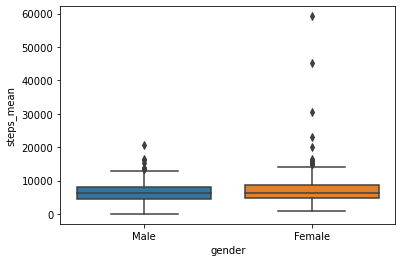

In [13]:
sns.boxplot(y="steps_mean", x= "gender", data=df_merged)

<AxesSubplot:xlabel='education_1', ylabel='steps_mean'>

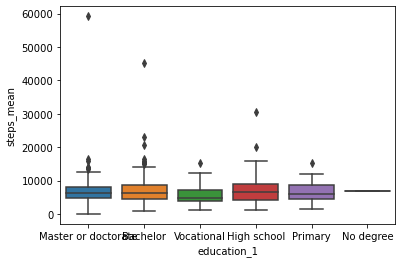

In [14]:
sns.boxplot(y="steps_mean", x= "education_1", data=df_merged)

# weekly assignment 2: fitbit 
    
- Feature engineering
The prediction of the model can be improved by computing a variable that gives a better indication of a healthy weight than weight alone. Can you think of one? If not, just skip this step.
- Exploratory data analysis
See last week for the first part (distribution of steps). In addition:
Make a scatterplot matrix of the numerical variables
Make a correlation matrix of the numerical variables
Describe and interpret the results

to give a better indication of weight alone, we can add the BMI

In [15]:
df_merged['height_in_meters'] = df_merged['height']/100
df_merged['height^2'] = df_merged['height_in_meters']*df_merged['height_in_meters']
df_merged['BMI'] = df_merged['weight']/df_merged['height^2']
print(df_merged)


      id         city  gender    age  hh_size  education          education_1  \
0      1     Bordeaux    Male  25-34        4          4  Master or doctorate   
1      2        Lille    Male  35-44        1          3             Bachelor   
2      3  Montpellier    Male  25-34        2          2  Master or doctorate   
3      4         Lyon    Male    <25        1          1             Bachelor   
4      5  Montpellier  Female  25-34        3          4             Bachelor   
..   ...          ...     ...    ...      ...        ...                  ...   
924  925        Lille  Female  45-54        3          4  Master or doctorate   
925  926        Lille    Male    <25        3          5             Bachelor   
926  927  Montpellier    Male  35-44        2          2             Bachelor   
927  928        Lille  Female  55-64        1          1          High school   
928  929         Lyon    Male  25-34        2          2          High school   

     height  weight  20-6-2

# Make a scatterplot matrix of the numerical variables
numerical variables:
- age 
- hh_size 
- education 
- height 
- weight 
- steps_mean 
- BMI


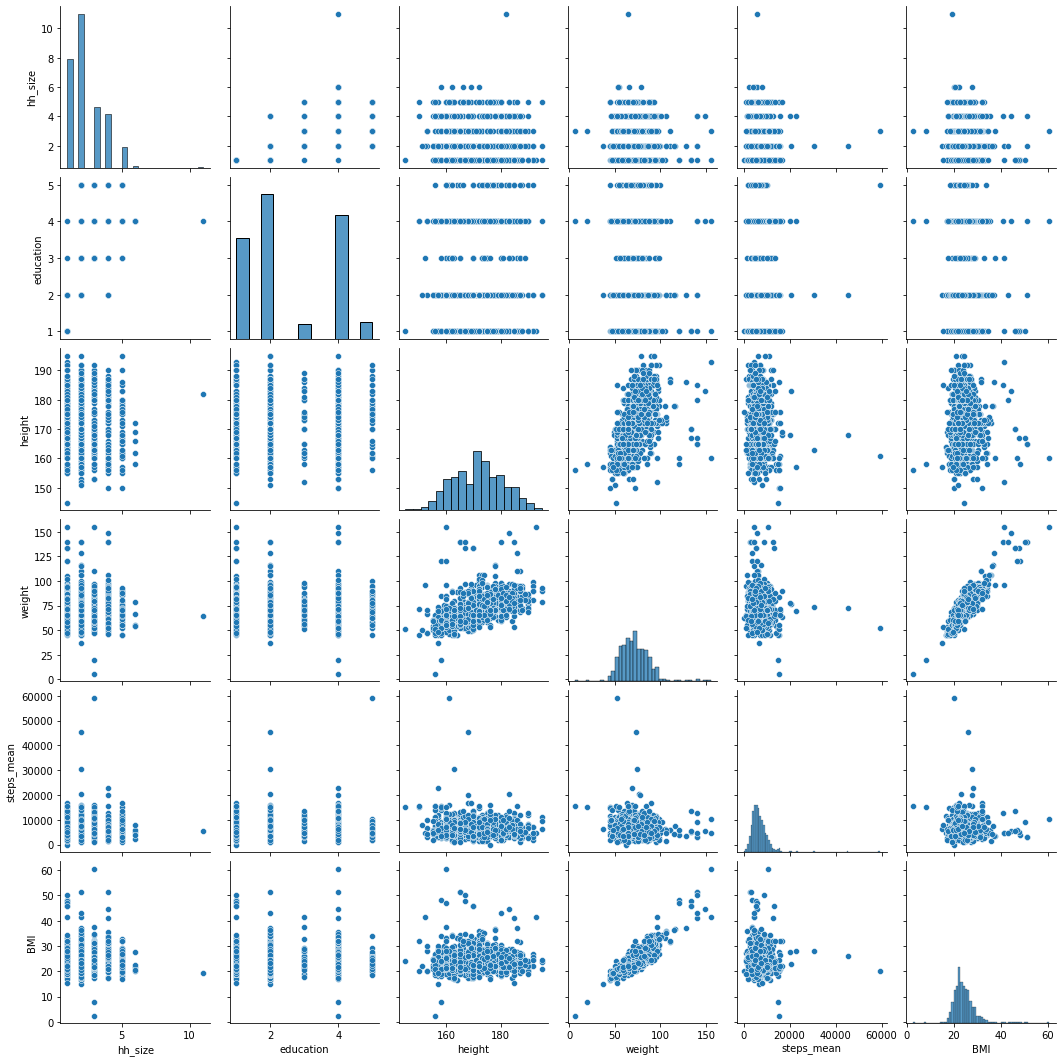

In [16]:
df_sel = df_merged[['age', 'hh_size', 'education', 'height', 'weight', 'steps_mean', 'BMI']]

sns.pairplot(df_sel)
plt.show()

# Make a correlation matrix of the numerical variables

In [17]:
corr =df_sel.corr()
print(corr)

             hh_size  education    height    weight  steps_mean       BMI
hh_size     1.000000   0.824982 -0.056189  0.001202    0.035761  0.027477
education   0.824982   1.000000 -0.043715 -0.002341    0.041097  0.014347
height     -0.056189  -0.043715  1.000000  0.514950   -0.097169  0.038336
weight      0.001202  -0.002341  0.514950  1.000000   -0.085238  0.871191
steps_mean  0.035761   0.041097 -0.097169 -0.085238    1.000000 -0.044964
BMI         0.027477   0.014347  0.038336  0.871191   -0.044964  1.000000


# Describe and interpret the results

- i have no idea what hh_size means but is has a very significant correlation with education 
- height and weight are obviously correlated because usually if you are taller you are heavier 
- BMI and weigt has the highest correlation of them all, but BMI and height on the other hand does not, that is probably because the difference in heights is lower that the differnces in weights 


# weekly assignment 3

**Predictive model

- Explain linear regression in your own words
- Create dummy variables for the categorical variables
- Fit a linear regression model to predict the mean steps per participant, using the training data. You can include all variables (easy), or you can try to find the combination that gives you the best fit (harder).

**Evaluation

- Evaluate the model on the test data

*Predictive power of the model (R2, RMSE)
*Investigate the residuals

- Describe and interpret the results

**Conclusion

# explain linear regression in your own words:
- linear regression is a predictive model that is meant to predict a sertain value when new variables are given. the better the model the better it is in predicting the correct value. in other words: the errors is smaller than when the model is bad. the error is the differnce in the predicted (calculated via model) value and the actual (real) value.

# Create dummy variables for the categorical variables
dummer variables:
- city 
- gender 
- education_1
- age 

In [18]:
df_sub=df_merged[['city', 'gender', 'education_1', 'age']]#to get all the categorical variables 
df_sub['city'].value_counts()#to look what levels it contains 


Lille          501
Montpellier    153
Lyon           142
Bordeaux       128
Name: city, dtype: int64

In [19]:
df_sub['gender'].value_counts()#to look what levels it contains 

Male      491
Female    433
Name: gender, dtype: int64

In [20]:
df_sub['education_1'].value_counts()#to look what levels it contains 

Master or doctorate    409
Bachelor               355
High school            106
Vocational              40
Primary                 13
No degree                1
Name: education_1, dtype: int64

In [21]:
df_sub['age'].value_counts()#to look what levels it contains

25-34    425
35-44    176
45-54    146
<25      124
55-64     46
65+        7
Name: age, dtype: int64

In [22]:
df = pd.get_dummies(df_sub, drop_first= True)#create dummy table for all the categorical variables 
df.head()

,city_Lille,city_Lyon,city_Montpellier,gender_Male,education_1_High school,education_1_Master or doctorate,education_1_No degree,education_1_Primary,education_1_Vocational,age_35-44,age_45-54,age_55-64,age_65+,age_<25
0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
1,1,0,0,1,0,0,0,0,0,1,0,0,0,0
2,0,0,1,1,0,1,0,0,0,0,0,0,0,0
3,0,1,0,1,0,0,0,0,0,0,0,0,0,1
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0


# Fit a linear regression model to predict the mean steps per participant, using the training data. You can include all variables (easy), or you can try to find the combination that gives you the best fit (harder).

In [23]:
x = df #all the independent variables 
#x = df.loc[:, ~df.columns.isin(['price'])]
y = df_merged['steps_mean'] # dependent variable 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3,random_state=18) #splits the data into train (70%) and test (30%) data

- creating a dataframe with the dependant variables and independant variables to than calculate the corr between all of them to get "the best fit" for the independant variables. in other words; which independant variables should be used when fitting the linear regression model:

In [24]:
corr1 = pd.concat([df, df_merged["steps_mean"]], axis = 1)  
# making correlation matrix 
corr2 =corr1.corr()
print(corr2)


                                 city_Lille  city_Lyon  city_Montpellier  \
city_Lille                         1.000000  -0.463756         -0.484805   
city_Lyon                         -0.463756   1.000000         -0.189828   
city_Montpellier                  -0.484805  -0.189828          1.000000   
gender_Male                       -0.070625   0.003267          0.068254   
education_1_High school            0.044483  -0.040398         -0.059860   
education_1_Master or doctorate   -0.055817   0.091502          0.060236   
education_1_No degree             -0.035822   0.077243         -0.014663   
education_1_Primary               -0.000898   0.051014         -0.053215   
education_1_Vocational             0.024675  -0.046408         -0.023225   
age_35-44                         -0.018967   0.045489          0.013770   
age_45-54                          0.016900  -0.044734          0.006583   
age_55-64                          0.000584  -0.028551         -0.008258   
age_65+     

if we look at the column "steps_mean" we can see that the correlation is very low between that column (dependant column) and the independant vaiables. for this reason i am just going to use all the variables 

In [25]:
lm = LinearRegression() #create a new (empty model)
lm = lm.fit(x_train, y_train) #fit the model WITH THE TRAIN DATA ONLY

b0 = lm.intercept_ #lm.coef_ gets a list of coefficients (excluding the intercept). [0] gets the actual number from the list
b1 = lm.coef_[0] #gets the intercept

print(f"The regression line is equal to y = {b0:.2f} + {b1:.2f}X") #.0f formats to 2 decimals.

The regression line is equal to y = 6355.96 + 586.90X


# Evaluate the model on the test data

- Predictive power of the model (R2, RMSE)
- Investigate the residuals

In [26]:
y = 6355.96 + 586.90*x_test
print(y) 

     city_Lille  city_Lyon  city_Montpellier  gender_Male  \
55      6355.96    6355.96           6355.96      6942.86   
799     6942.86    6355.96           6355.96      6355.96   
563     6355.96    6355.96           6942.86      6942.86   
469     6355.96    6355.96           6355.96      6942.86   
190     6355.96    6942.86           6355.96      6942.86   
..          ...        ...               ...          ...   
880     6942.86    6355.96           6355.96      6355.96   
877     6942.86    6355.96           6355.96      6942.86   
392     6355.96    6942.86           6355.96      6942.86   
586     6355.96    6355.96           6355.96      6942.86   
498     6355.96    6942.86           6355.96      6942.86   

     education_1_High school  education_1_Master or doctorate  \
55                   6355.96                          6355.96   
799                  6355.96                          6942.86   
563                  6355.96                          6942.86   
469    

- i Obviously did something wring here. it predicted the mean steps for every x variable input. i have no idea how to fix this. the only way i can think of how this could work is to take one variable when making the test and training sets, but i know that is not the assignment. so i am just going to role with it.

- predictive power R2 and RMSE: couldn't be much worse:

In [27]:
y_test_p = lm.predict(x_test) #Generate the predictions and store them in y_test_p. USE ONLY THE TEST DATA HERE
r2_score(y_test, y_test_p) #this gives the model fit (R2) for the Y and predicted Y

-0.008275720108001705

In [28]:
math.sqrt(mean_squared_error(y_test, y_test_p)) #this gives the model fit (R2) for the Y and predicted Y

4175.586057051782

# Describe and interpret the results
- The R2 indicates that 0,8% of changes in mean steps is due to the independend variables. which realy can't get much worse than this, but than again, i probably fucked something up 
- the RMSE is 4175 steps, which is the average error in the prediction of mean steps per person.
# Conclusion
- this is a bad model, noboby should ever use this 

# handige dingen uit andere opdrachten die later miss handig toe te passen zijn 

In [29]:
# om het aantal, nummer en soort van alle kolommen te krijgen 
df.info(verbose=True) 
# om de tekst onder een diagram schuin te zetten zodat het beter staat 
plt.xticks(rotation=45)
# om bij specifieke kolommen de mean te berekenen en die in een nieuwe kolom zetten 
df['steps_mean']=df.iloc[:,9:336].mean(axis=1)
#om sommige rijen eruit te halen zijn er stukken genomen en vervolgens weer samengevoegd 
df_sub=df.loc[:;,'manufacturer_name':'location_region']
df_sub2=df.loc[:,'duration_listed']
df=pd.concat([df_sub, df_sub2],axis=1)
df.head()

SyntaxError: invalid syntax (1165408290.py, line 8)